In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)
gender
geography=pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [6]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU


In [11]:
classifier=Sequential()

In [12]:
#frist hidden layer
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [13]:
#second hidden layer
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
#output layer
classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [14]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6129 - accuracy: 0.6934 - val_loss: 0.5085 - val_accuracy: 0.8008
Epoch 2/100
536/536 [==============================] - 0s 848us/step - loss: 0.4973 - accuracy: 0.7929 - val_loss: 0.4787 - val_accuracy: 0.7993
Epoch 3/100
536/536 [==============================] - 0s 900us/step - loss: 0.4764 - accuracy: 0.7934 - val_loss: 0.4663 - val_accuracy: 0.7989
Epoch 4/100
536/536 [==============================] - 0s 888us/step - loss: 0.4646 - accuracy: 0.7934 - val_loss: 0.4579 - val_accuracy: 0.7997
Epoch 5/100
536/536 [==============================] - 0s 834us/step - loss: 0.4561 - accuracy: 0.7923 - val_loss: 0.4521 - val_accuracy: 0.8001
Epoch 6/100
536/536 [==============================] - 0s 873us/step - loss: 0.4498 - accuracy: 0.7940 - val_loss: 0.4483 - val_accuracy: 0.7993
Epoch 7/100
536/536 [==============================] - 0s 820us/step - loss: 0.4454 - accuracy: 0.7938 - val_loss: 0.4448 - val_accu

536/536 [==============================] - 0s 842us/step - loss: 0.3615 - accuracy: 0.8524 - val_loss: 0.3808 - val_accuracy: 0.8364
Epoch 58/100
536/536 [==============================] - 0s 853us/step - loss: 0.3606 - accuracy: 0.8518 - val_loss: 0.3800 - val_accuracy: 0.8379
Epoch 59/100
536/536 [==============================] - 0s 813us/step - loss: 0.3596 - accuracy: 0.8515 - val_loss: 0.3790 - val_accuracy: 0.8387
Epoch 60/100
536/536 [==============================] - 0s 844us/step - loss: 0.3585 - accuracy: 0.8533 - val_loss: 0.3781 - val_accuracy: 0.8395
Epoch 61/100
536/536 [==============================] - 0s 827us/step - loss: 0.3575 - accuracy: 0.8528 - val_loss: 0.3772 - val_accuracy: 0.8395
Epoch 62/100
536/536 [==============================] - 0s 878us/step - loss: 0.3565 - accuracy: 0.8533 - val_loss: 0.3763 - val_accuracy: 0.8410
Epoch 63/100
536/536 [==============================] - 0s 890us/step - loss: 0.3557 - accuracy: 0.8541 - val_loss: 0.3755 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


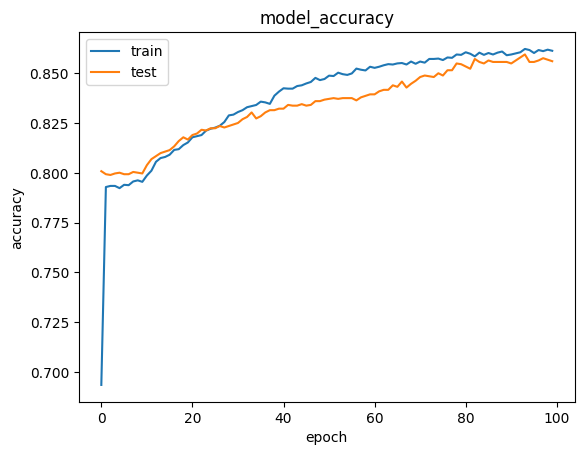

In [17]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

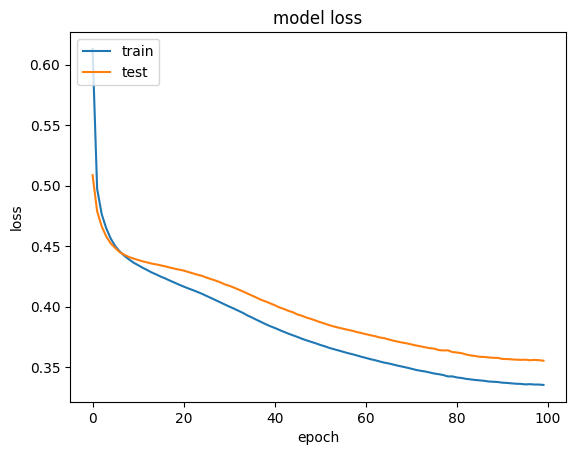

In [18]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 472us/step


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1544,   61],
       [ 215,  180]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.862